# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

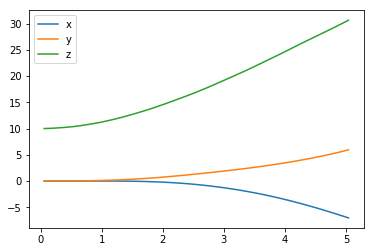

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

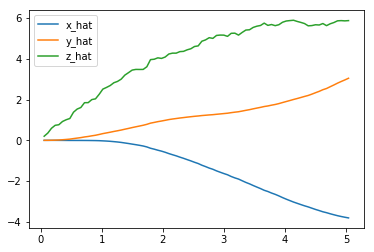

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

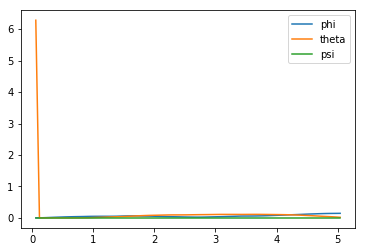

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

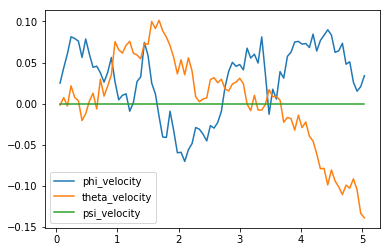

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

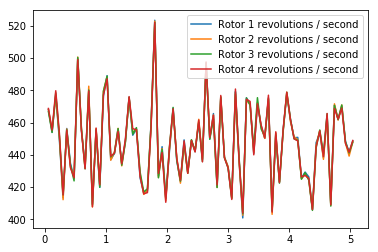

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-7.04585362e+00  5.95015326e+00  3.06602028e+01  1.45835920e-01
  1.98064307e-02  0.00000000e+00]
[-3.80337986  3.04400258  5.87006044]
[ 0.03394517 -0.13942445  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.283 (best =   0.568), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [28]:
from agents.agents import DDPG
from task import TaskSeekAndHover, DroneState

num_episodes = 2000

init_pos = [0.,0.,20.]
init_state = DroneState(pos=init_pos,time=15.)

target_pos = np.array([10., 10., 50.])
target_state = DroneState(pos=target_pos)
task = TaskSeekAndHover(init_state = init_state, target_state=target_state)
agent = DDPG(task)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    done = False
    while not done:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
    print("\rEpisode = {:4d}, steps = {:4d}, score = {:10.6f} (best = {:10.6f},{:4d}), noise_scale = {:7.3f}".format(
        i_episode, agent.count, agent.score, agent.best_score, agent.best_score_count, agent.noise_scale), end="")  # [debug]
    sys.stdout.flush()

file_output = 'ddpg.txt'                         # file name for saved results

labels = ['time', 'reward',\
          'x', 'y', 'z',\
          'phi', 'theta', 'psi',\
          'x_velocity', 'y_velocity', 'z_velocity',\
          'phi_velocity', 'theta_velocity', 'psi_velocity',\
          'distance_to_target', 'total_velocity', 'angular_velocity',\
          'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    agent.restore_learning()
    state = agent.reset_episode(use_noise=False) # start a new episode
    done = False
    while not done:
        action = agent.act(state)
        drone_state = task.curr_state
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        to_write = [drone_state.time, reward] + drone_state.tolist()\
        + [drone_state.distance_to(target_state), drone_state.total_velocity(), drone_state.total_angular_velocity()]\
        + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = next_state
    print("\nfinal score: ",agent.score)        
    
print(len(results['time']), " time steps in best episode")    

Initializing mission:
Starting position: XYZ: (0.0,0.0,20.0) phi: 0.0 theta: 0.0 psi: 0.0 Vxyz: (0.0,0.0,0.0) Vphi: 0.0 Vtheta: 0.0 Vpsi: 0.0 time: 15.0

Target position: XYZ: (10.0,10.0,50.0) phi: 0.0 theta: 0.0 psi: 0.0 Vxyz: (0.0,0.0,0.0) Vphi: 0.0 Vtheta: 0.0 Vpsi: 0.0 time: 0

State size: 11
Episode = 2000, steps =  573, score =   0.157847 (best =   0.232014, 750), noise_scale =   4.330
final score:  0.2363418851162144
600  time steps in best episode


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

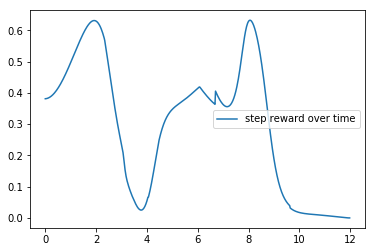

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['reward'], label='step reward over time')
plt.legend()
_ = plt.ylim()

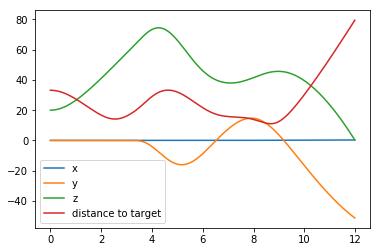

In [38]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.plot(results['time'], results['distance_to_target'], label='distance to target')
plt.legend()
_ = plt.ylim()

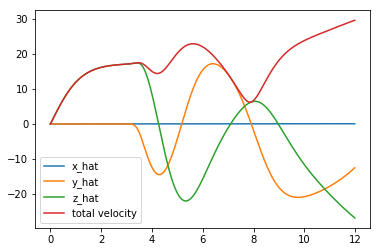

In [40]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.plot(results['time'], results['total_velocity'], label='total velocity')
plt.legend()
_ = plt.ylim()

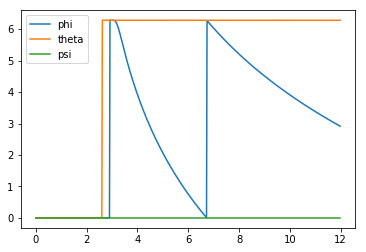

In [41]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

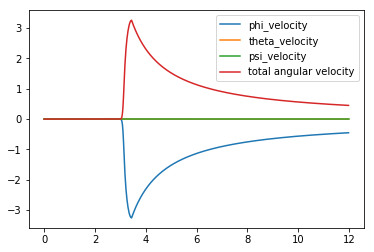

In [42]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.plot(results['time'], results['angular_velocity'], label='total angular velocity')
plt.legend()
_ = plt.ylim()

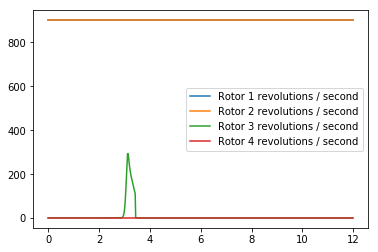

In [43]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [44]:
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  0.29031321 -51.48367843   0.           2.90669832   6.28188091
   0.        ]
[  0.05217999 -12.35210873 -26.90451919]
[-4.49708435e-01 -1.48823105e-04  0.00000000e+00]


## Reflections

## Question 1:
Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
- First, I created some geometrical utility functions in physics_sim_utils.py
- Second, I created the small class "DroneState" which holds the current state of the simulation together with more geometrical utility functions, such as direction, distance to other DroneState etc...
- Finaly I created the TaskSeekAndHover task class which is designed to calculate a seek task from point init_state to point target_state. **My task keeps running till timeout reached or crash.** It means that the drone should try to hover around the target as long as the clock is ticking.

The reward is calculated for each new state at the method: __calc_state_value() so accumulating the rewards of all the states in a given episode and divide them by the **maximum** time of episode will result a meaningful score for the entire episode in the learning process. The reward itself (state value) is a number between 0.0 to 1.0 inclusive where zero is the worst outcome of crash, and one is best value that means touching the target. The reward is consists of several sub-rewards, each one is also a number between zero to one, and I multiply them eventually to have result of "and" like operator. The sub-rewards are:
- distance score: 0.0 means touching the bounds, 1.0 means touching the target, all the rest of the space is continuous without any local maxima except of the global maxima at the target.
- theta angle score: 1.0 means the drone rottors points up, 0.0 means the drone is upside-down and its rottors are pointing to the ground
- phi angle is not important for me so I don't care about its value for reward purpose
- psi doesn't work at all in this simulation
- angle velocity score: I combined all the angular velocities into single representitive angular velocity. 1.0 means the drone is not rotating at all. 0.0 means the drone rotates in infinite speed.
- collision prediction score: 1.0 means the drone is not supposed to crash before the timeout. 0.0 means the drone will crash immediatly.
- velocity **direction** score: 1.0 means the velocity direction points to the target, 0.0 means the velocity direction points away from the target to the opposite wrong direction

State Vector Values
- The values passed to the agent are rottated with respect to phi angle, because I assume the quadcopter is not symetric and each rottor has a predefined designated location in the quadcopter. This should give the RL algorithm the capability to distinguish between the rottors.
- The values are also normalized to the range of -1.0 to 1.0 using "characteristics values"

## Question 2:
Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I used the provided DDPG agent that implements the Actor-Critic RL algorithm as the first draft.
- **I created my own replay double buffer** for storing the explored experience steps. I classified each experience step to "good" and "bad" according to the change is the state value. I stored the "good" and the "bad" in different queue, and I sampled them in a symetric manner. This way I get a balanced data that reminds the data augmentation process, so my network would be balanced w.r.t. the whole good and bad state-action space. Like training a classifier to distinguish between dogs and cats by using balanced number of photos of dogs and cats.
- I modified the Ulenbek noise algorithm to be able to change its behaviour during the learning process: 
When the algorithm encounters a better episode score, it reduces the noise to better search around the learning weights space of the network. When the algorithm encounters a worse result than the best so far it enlarges the noise in order to expand the exploration to the state-action space.
- Eventually, the noise become too large and it useless to enlarge it more because the exploration returns action values out of range. So I save the best network weights, and I **reset** the entire learning process in order to clean the networks and to **clean the the experience too**. If I don't do that the network will converge to the same result as before because it uses the same experience values.
- For any episode evaluation process, **I temporarily shut down** the noise exploration process to measure exactly the current score and also to freeze the learning process that goes on for each episode step. 

** Hyperparameters for the exploration process**
- exploration_mu    = 0 because I don't want any biased exploration for the actions.
- exploration_theta = 0.01 theta units are proportional to the action range, so I set it to 1% instead of the original 15%, because I want a minor exploration ratio around the original action values
- exploration_sigma = 0.05 I didn't check the best value for sigma so I kept the original. It's purpose is to apply additional noise from normal distribution with standard deviation of sigma.
- Maximal noise scale was set to 5.0, means that if the current noise is 5 times or more larger than the original noise, then the learning process is stucked. A reset learning will be applied in that case.


** Hyperparameters for the learning process**
- max_unsuccessful_episodes_in_a_row = 10, I decided that if the episode score does not improve in the last 10 episode then I enlarge the noise by 50%. If I do encounter a better episode score, then the noise reduces by 50%. It's not symetrical by purpose in order to enlarge the noise more slowly on worse episodes which are much more common than better ones. ("proof": 1.5 * 0.5 = 0.75 < 1.0)
- Replay memory combined buffer size is 10000.
- Replay memory combined sample size is 64
- gamma was kept at 0.99
- tau was kept at 0.1

** Neural Network Architecture**
- The activation function I used everywhere was "elu" instead of "relu" because I suspected the network become stucked in the learning process.
- I discovered that batch normalization reduced the best score, maybe because I already normalizing the input values to the range of +- 1.0
- I changed the given number of neurons in each dense layer to get better overall performance (usually I multiplied the original number by two)
- I added 3 dense layers for the combined critic network, because the predicted Q values should be complex combination of the state values and the action values that comes from each sub netwrok.


## Question 3:
Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- It was a hard task, even in the best episode, the drone didn't managed to stay and hover near the target.
- Most of the time the learning was stucked in the low scores, and suddenly advanced to more reasonable episode score. After a while, the learning reached its max so I used a recent learning process to retry the entire learning to achieve even better score.
- The final perfomance of the agent where meduim-low, around 25% of the maximal theoretical score.

## Question 4:
Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Except from the neural networks themselves, all the material for this project was entirely new to me. I didn't have any significant experience in 1-D or 2-D project that involves continuous coordinate system (non discrete) and with RL that utilizing neural networks. So I felt lost at the beginning of the work on this 3-D project.
- I tried many approaches to calculate the reward function. Eventually I decided to use a geometrical approach without any "magic numbers" nor hyperparameters for it.
- At the beginning of my work, I thought it would be easy to teach the quadcopter to seek and hover around a target for a specific period of time. Later I compromised just to try to reach the target and hover around it at the rest of the time till the timeout. That made my task a bit simpler and let me calculate the total reward in more fairly manner.
- I'm planning to take the more nanodegrees in this subject because I think it is important for my future career goals.